In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

%matplotlib inline

In [65]:
imdf = pd.read_csv('./imdf_full.csv', index_col=0)
imdf.head()

,Actors,Awards,Box Office ($),Country,Director,Genre,Language,MPAA Rating,Metacritic Score,Movie Title,...,Ziad Doueiri,Zoe Lister-Jones.1,Zoe R. Cassavetes,Zoltan Deme,Zoltan Spirandelli,Zoya Akhtar,Álex de la Iglesia,Élie Chouraqui,Émile Gaudreault,Éric Rohmer
0,"['Rosanna Arquette', 'Madonna', 'Aidan Quinn',...",Nominated for 1 Golden Globe. Another 1 win & ...,27400000,USA,Susan Seidelman,"['Comedy', 'Drama']",English,PG-13,71.0,Desperately Seeking Susan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Jackie Chan', 'Danny Aiello', 'Sandy Alexand...",NaN,829000,"Hong Kong, USA",James Glickenhaus,"['Action', 'Crime', 'Thriller']","English, Cantonese",R,NaN,The Protector,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Simon Srebnik', 'Michael Podchlebnik', 'Motk...",14 wins.,15642,"France, UK",Claude Lanzmann,"['Documentary', 'History', 'War']","German, Hebrew, Polish, Yiddish, French",NOT RATED,99.0,Shoah,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Kevin Kline', 'Scott Glenn', 'Kevin Costner'...",Nominated for 2 Oscars. Another 1 win & 2 nomi...,33200000,USA,Lawrence Kasdan,"['Action', 'Crime', 'Drama']",English,PG-13,64.0,Silverado,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Jeff Bridges', 'Rosanna Arquette', 'Alexandr...",1 nomination.,1305114,USA,Hal Ashby,"['Action', 'Crime', 'Drama']","English, Spanish",R,NaN,8 Million Ways to Die,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I'll be dropping all non-numeric columns for modeling. As well as observations with NaN values.

In [3]:
imdf1 = imdf.drop(['Actors','Metacritic Score','Rotten Tomatoes Score', 'imdb Score','imdb ID',
                  'Release Date', 'Awards', 'Director', 'Genre', 'Movie Title', 'Plot',
                  'Country','Language', 'MPAA Rating', 'Production Studio',
                  'Year of Release', 'Writer'], axis=1)

In [4]:
imdf1.dropna(inplace=True)

Next up is dropping actors and directors that don't have a large portfolio to reduce the number of features.

In [5]:
how_are_you_here = [col for col in imdf1 if imdf1[col].sum() == 0]
one_act = [col for col in imdf1 if imdf1[col].sum() == 1]
two_acts = [col for col in imdf1 if imdf1[col].sum()==2]
three_times_no_charm = [col for col in imdf1 if imdf1[col].sum()==3]
four_no_more = [col for col in imdf1 if imdf1[col].sum()==4]
five_dont_thrive = [col for col in imdf1 if imdf1[col].sum()==5]

In [6]:
imdf1 = imdf1.drop(how_are_you_here, axis=1)
imdf1 = imdf1.drop(one_act, axis = 1)
imdf1 = imdf1.drop(two_acts, axis = 1)
imdf1 = imdf1.drop(three_times_no_charm, axis=1)
imdf1 = imdf1.drop(four_no_more, axis=1)
imdf1 = imdf1.drop(five_dont_thrive, axis=1)

Let's see what we're dealing with now that we've sifted out smaller portfolios as features in our data frame.

In [7]:
imdf1.shape

(6261, 860)

### Modeling Box Office

Let's set our target variable and independent variables.

In [8]:
y1 = imdf1['Box Office ($)']
X1 = imdf1.drop('Box Office ($)', axis = 1)

Train/Test split. Good practice for any predictive model.

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.8, random_state=1016)

In [10]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)
lr.score(X1_test, y1_test)

-3.345813868564926e+19

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


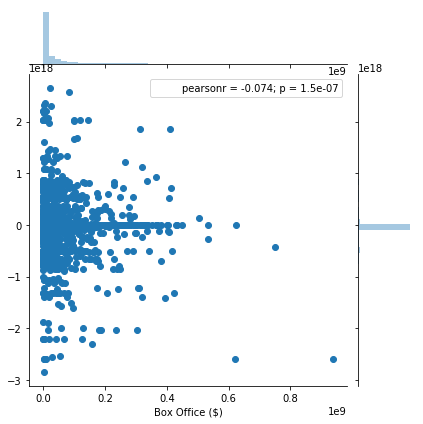

In [11]:
ypred1 = lr.predict(X1_test)
sns.jointplot(y1_test, ypred1)

In [13]:
rf = RandomForestRegressor(random_state=1016)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)

0.3328839193759766

Okay, not the most exciting numbers, this is something we can definitely fine tune in the future. </br>
Let's try predicting the box office returns on an entirely new, made-up horror movie starring Emma Stone and directed by Christopher Nolan.

In [14]:
columns = imdf1.columns
new_df1 = pd.DataFrame(np.zeros(shape=(1,860)), columns=columns)
new_df1

,Box Office ($),Runtime,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Steven Soderbergh,Steven Spielberg,Susanne Bier,Tim Burton,Todd Phillips,Tyler Perry.1,Werner Herzog.1,Woody Allen.1,Yimou Zhang,Zack Snyder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
new_df1['Emma Stone'] = 1.0
new_df1['Horror'] = 1.0
new_df1['Christopher Nolan'] = 1.0

In [22]:
rf.predict(new_df1.drop('Box Office ($)', axis = 1))/1000000

array([19.7893695])

In [16]:
result1 = rf.predict(new_df1.drop('Box Office ($)', axis = 1))/1000000

In [18]:
result1 = str(result1)
result1 = result1.replace('[', '')
result1 = result1.replace(']', '')

In [19]:
result1

'19.7893695'

In [24]:
print("Your film idea is predicted to return "+str(result1)[0:4]+"M dollars!")

Your film idea is predicted to return 19.7M dollars!


### Modeling Rotten Tomatoes

In [66]:
imdf2 = imdf.drop(['Actors','Metacritic Score','Box Office ($)', 'imdb Score','imdb ID',
                  'Release Date', 'Awards', 'Director', 'Genre', 'Movie Title', 'Plot',
                  'Country','Language', 'MPAA Rating', 'Production Studio',
                  'Year of Release', 'Writer'], axis=1)

In [67]:
imdf2.dropna(inplace=True)

In [68]:
imdf2 = imdf2.drop(how_are_you_here, axis=1)
imdf2 = imdf2.drop(one_act, axis = 1)
imdf2 = imdf2.drop(two_acts, axis = 1)
imdf2 = imdf2.drop(three_times_no_charm, axis=1)
imdf2 = imdf2.drop(four_no_more, axis=1)
imdf2 = imdf2.drop(five_dont_thrive, axis=1)

In [69]:
imdf2.shape

(5839, 860)

In [71]:
y2 = imdf2['Rotten Tomatoes Score']
X2 = imdf2.drop('Rotten Tomatoes Score', axis = 1)

In [72]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.8, random_state=1016)

In [73]:
lr.fit(X2_train,y2_train)
lr.score(X2_test, y2_test)

-2.8842556941961216e+20

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


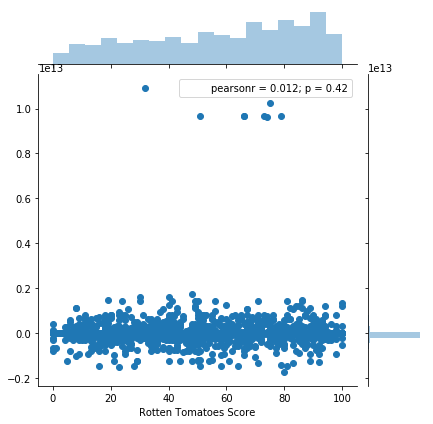

In [74]:
ypred2 = lr.predict(X2_test)
sns.jointplot(y2_test, ypred2)

In [75]:
rf.fit(X2_train,y2_train)
rf.score(X2_test,y2_test)

-0.03278754597949707

In [76]:
columns = imdf2.columns
new_df2 = pd.DataFrame(np.zeros(shape=(1,860)), columns=columns)
new_df2

,Rotten Tomatoes Score,Runtime,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Steven Soderbergh,Steven Spielberg,Susanne Bier,Tim Burton,Todd Phillips,Tyler Perry.1,Werner Herzog.1,Woody Allen.1,Yimou Zhang,Zack Snyder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
new_df2['Emma Stone'] = 1.0
new_df2['Horror'] = 1.0
new_df2['Christopher Nolan'] = 1.0

In [80]:
rf.predict(new_df2.drop('Rotten Tomatoes Score', axis = 1))

array([49.5])

In [81]:
result2 = rf.predict(new_df2.drop('Rotten Tomatoes Score', axis = 1))

In [83]:
result2 = str(result2)
result2 = result2.replace('[', '')
result2 = result2.replace(']', '')

In [84]:
result2

'49.5'

In [85]:
print("Your film idea is predicted to score "+str(result2)+"% on Rotten Tomatoes")

Your film idea is predicted to score 49.5% on Rotten Tomatoes


It turns out that predicting Rotten Tomatoes scores isn't reliable with the data we have.